In [7]:
from itertools import islice
import csv
import matplotlib.pyplot as plt

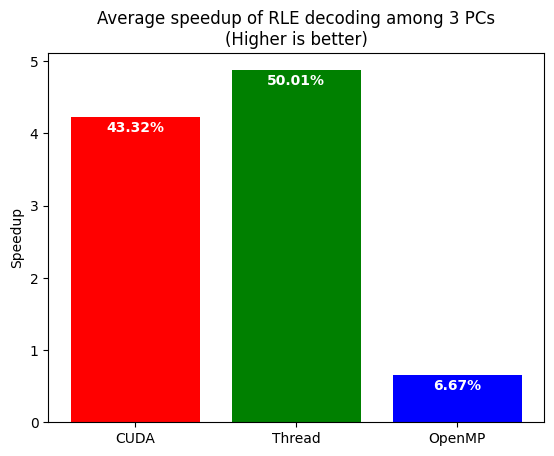

In [8]:
report_file = open("rle_decode_avg_speedup.csv")
parallel_techniques = []
speedups = []
total_speedup = 0

for row in islice(csv.reader(report_file), 1, None):
    [parallel_technique, speedup] = row
    parallel_techniques.append(parallel_technique)
    speedups.append(float(speedup))
    total_speedup += float(speedup)

percentages = []

for speedup in speedups:
    percentages.append(speedup / total_speedup)

graph = plt.bar(parallel_techniques, speedups, color=['red', 'green', 'blue'])
plt.title('Average speedup of RLE decoding among 3 PCs\n(Higher is better)')
plt.ylabel('Speedup')

index = 0

for p in graph:
    x, y = p.get_xy()
    
    plt.text(
        x + p.get_width() * 0.5,
        y + p.get_height() - 0.2,
        f"{'{:.2f}'.format(percentages[index] * 100)}%",
        ha='center',
        weight='bold',
        color='white'
    )
    
    index += 1

plt.show()
plt.close()


In [9]:
report_file.close()